#Setup

In [ ]:
!pip install qiskit

In [43]:
!pip install pylatexenc

In [46]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, BasicAer, Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.extensions import *
import matplotlib.pyplot as plt
from qiskit.quantum_info import random_statevector
from qiskit.tools.jupyter import *
from timeit import default_timer as timer

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#QFT checker

In [58]:
n = 4
# qc.h([2,3,4,5,6])
# qc.x([0,1,2])
# qc.h([0])
vec = random_statevector(2**n)

start = timer()
qc = QuantumCircuit(n)
# initial_state = qc.initialize(vec.data, range(n))
for j in range(n-1,-1,-1):
    qc.h(j)
    for m in range(j-1,-1,-1):
        qc.cp(np.pi/float(2**(j-m)), j, m)
for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
# for qubit in range(n//2):
#         qc.swap(qubit, n-qubit-1)
# for j in range(n):
#         for m in range(j):
#             qc.cp(-np.pi/float(2**(j-m)), m, j)
#         qc.h(j)
# qc.measure_all()
# # qc.draw(output = "mpl")
# qasm_sim = BasicAer.get_backend('qasm_simulator')
# shots = 2048
# counts = execute(qc, backend = qasm_sim, shots= shots).result().get_counts()
# # plot_histogram(counts)
# counts = dict(counts)
# for i in range(2**n):
#   key = format(i,"0"+str(n)+"b")
#   if key in counts.keys():
#     counts[key] /= shots
#   else:
#     counts[key] = 0
#     # print(str(i)+" "+str(counts[format(i,"0"+str(n)+"b")]))

sim = Aer.get_backend('statevector_simulator')
job = execute(qc, sim)
out = job.result().get_statevector(qc)
end = timer()
out = abs(out)**2
# printf("Time taken for circuit creation and execution = ", end-start)
input_file = open("/content/drive/MyDrive/GPU_Project/qft_input.txt","w")
input_file.write(str(n)+"\n")
for i in vec.data:
  input_file.write(str(i.real)+" "+str(i.imag) + "\n")
  # input_file.write("0 0\n")
input_file.close()
output_file = open("/content/drive/MyDrive/GPU_Project/qft_output.txt","w")
for i in range(len(out)):
  output_file.write(str(out[i])+"\n")
output_file.close()

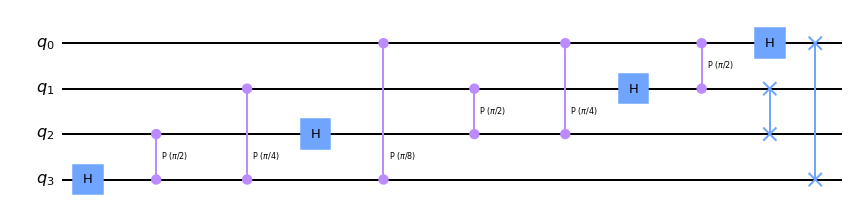

In [59]:
qc.draw(output = "mpl")

In [56]:
max(out)

0.007766929381812529

# Random circuit test

In [57]:
n = 16
num_gates = 10000
gates_available = ["H","S","T","CNOT"]
vec = random_statevector(2**n)
circuit_file = open("/content/drive/MyDrive/GPU_Project/random_circuit_input.txt", "w")
circuit_file.write(str(n)+"\n")
circuit_file.write(str(num_gates)+"\n")

for i in vec.data:
  circuit_file.write(str(i.real)+" "+str(i.imag) + "\n")

qc = QuantumCircuit(n)
initial_state = qc.initialize(vec.data, range(n))

for i in range(num_gates):
  gate = np.random.choice(gates_available)
  if gate == "H":
    qubit = np.random.randint(n)
    qc.h(qubit)
    circuit_file.write("1 "+str(qubit)+"\n")
  elif gate == "S":
    qubit = np.random.randint(n)
    qc.rz(np.pi/2, qubit)
    circuit_file.write("2 "+str(qubit)+"\n")
  elif gate == "T":
    qubit = np.random.randint(n)
    qc.rz(np.pi/4, qubit)
    circuit_file.write("3 "+str(qubit)+"\n")
  elif gate == "CNOT":
    c_qubit, t_qubit = np.random.randint(n, size = (2))
    if c_qubit == t_qubit:
      t_qubit = abs(c_qubit-1)
    qc.cx(c_qubit, t_qubit)
    circuit_file.write("4 "+str(t_qubit)+" "+str(c_qubit)+"\n")
circuit_file.close()
# qc.measure_all()
# qasm_sim = BasicAer.get_backend('qasm_simulator')
# shots = 2048
# counts = execute(qc, backend = qasm_sim, shots= shots).result().get_counts()
qc_run = qc
sim = Aer.get_backend('statevector_simulator')
start = timer()
job = execute(qc_run, sim)
out = job.result().get_statevector(qc_run)
end = timer()
out = abs(out)**2
# counts = dict(counts)
# for i in range(2**n):
#   key = format(i,"0"+str(n)+"b")
#   if key in counts.keys():
#     counts[key] /= shots
#   else:
#     counts[key] = 0

print("Time taken = ", end-start)
output_file = open("/content/drive/MyDrive/GPU_Project/random_circuit_output.txt","w")
for i in range(len(out)):
  output_file.write(str(out[i])+"\n")
output_file.close()
# qc.draw(output = "mpl")


Time taken =  15.706798078999782


In [36]:
max(out)

0.022772707119042154

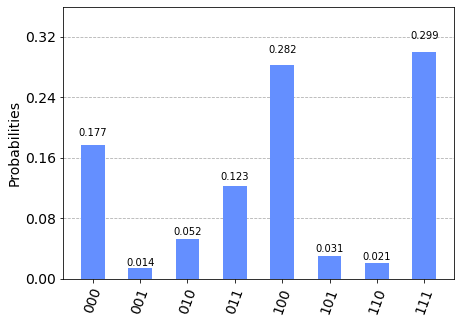

In [57]:
num_gates = 1
qc = QuantumCircuit(n)
initial_state = qc.initialize(vec.data, range(n))
# qc.h(0)
# qc.cx(2,0)
qc.measure_all()
qasm_sim = BasicAer.get_backend('qasm_simulator')
shots = 4096
counts = execute(qc, backend = qasm_sim, shots= shots).result().get_counts()
plot_histogram(counts)

In [80]:
n = 3
num_gates = 10
qc = QuantumCircuit(n)
vec = random_statevector(2**n)
initial_state = qc.initialize(vec.data, range(n))
gates_available = ["H","S","T","CNOT"]

circuit_file = open("/content/drive/MyDrive/GPU_Project/random_circuit_input.txt", "w")
circuit_file.write(str(n)+"\n")
circuit_file.write(str(num_gates)+"\n")

for i in vec.data:
  circuit_file.write(str(i.real)+" "+str(i.imag) + "\n")

for i in range(num_gates):
  gate = np.random.choice(gates_available)
  if gate == "H":
    qubit = np.random.randint(n)
    qc.h(qubit)
    circuit_file.write("1 "+str(qubit)+"\n")
  elif gate == "S":
    qubit = np.random.randint(n)
    qc.rz(np.pi/2, qubit)
    circuit_file.write("2 "+str(qubit)+"\n")
  elif gate == "T":
    qubit = np.random.randint(n)
    qc.rz(np.pi/4, qubit)
    circuit_file.write("3 "+str(qubit)+"\n")
  elif gate == "CNOT":
    c_qubit, t_qubit = np.random.randint(n, size = (2))
    if c_qubit == t_qubit:
      t_qubit = abs(c_qubit-1)
    qc.cx(c_qubit, t_qubit)
    circuit_file.write("4 "+str(t_qubit)+" "+str(c_qubit)+"\n")
circuit_file.close()
# qc.measure_all()

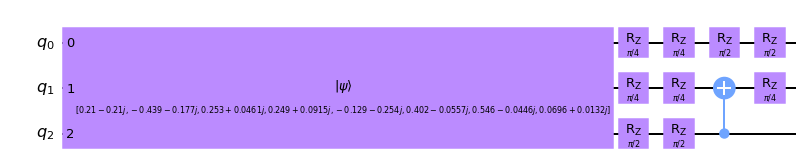

In [81]:
qc.draw(output = "mpl")

In [82]:
sim = Aer.get_backend('statevector_simulator')
job = execute(qc, sim)
out = job.result().get_statevector(qc)
print(out)

[ 0.27424133+0.11345574j -0.47339319+0.00428987j -0.21627137-0.13945771j
 -0.17997169+0.19536285j  0.48778148-0.25030671j -0.0144143 -0.06937262j
 -0.28376366+0.02176522j -0.39238668-0.10224657j]


In [90]:
abs(out)**2

1.0